📊 Data Loaded Successfully!
    cp_1  thal_3   oldpeak  exang   thalach  slope_2  target
0  False    True  0.161290      0  0.740458     True       0
1  False    True  0.500000      1  0.641221    False       0
2  False    True  0.419355      1  0.412214    False       0
3  False    True  0.000000      0  0.687023     True       0
4  False   False  0.306452      0  0.267176    False       0

✅ Model Evaluation:
🎯 Accuracy: 0.80
🎯 Precision: 0.81
🎯 Recall: 0.77
🎯 F1-score: 0.79

✅ Model saved at: C:\Users\mrahm\Downloads\ANU projects\Heart_Disease_Detection\heart_disease_model.pkl

🌳 Visualizing Decision Tree...


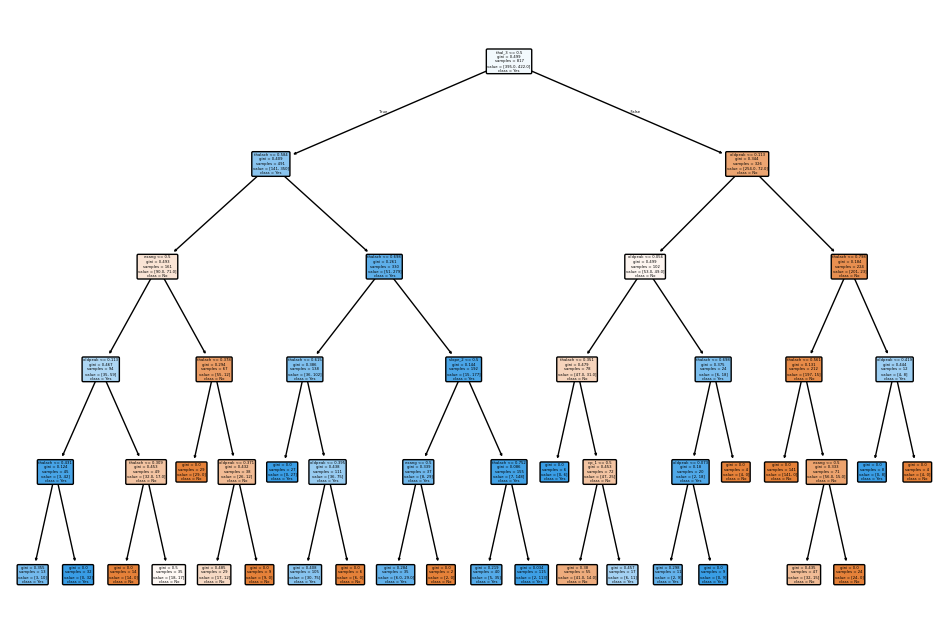

In [ ]:
import pandas as pd
import numpy as np
import joblib
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

file_path =r"C:\Users\mrahm\Downloads\heart_disease_project_restructured\data\cleaned_data3.csv"

def load_data():
    if os.path.exists(file_path):
        return pd.read_csv(file_path)
    return pd.DataFrame()

df = load_data()

if df.empty:
    print("⚠️ No data available. Please check the dataset path.")
else:
    print("📊 Data Loaded Successfully!")
    print(df.head())

    X = df.drop(columns=["target"])
    y = df["target"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    best_depth = 5
    best_min_samples = 4

    clf = DecisionTreeClassifier(max_depth=best_depth, min_samples_split=best_min_samples, random_state=42)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro', zero_division=1) 
    recall = recall_score(y_test, y_pred, average='macro', zero_division=1)       
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=1)              

    print("\n✅ Model Evaluation:")
    print(f"🎯 Accuracy: {accuracy:.2f}")
    print(f"🎯 Precision: {precision:.2f}")
    print(f"🎯 Recall: {recall:.2f}")
    print(f"🎯 F1-score: {f1:.2f}")


    model_path = r"C:\Users\mrahm\Downloads\ANU projects\Heart_Disease_Detection\heart_disease_model.pkl"
    joblib.dump(clf, model_path)
    print(f"\n✅ Model saved at: {model_path}")

    print("\n🌳 Visualizing Decision Tree...")

    fig, ax = plt.subplots(figsize=(12, 8))
    plot_tree(clf, feature_names=X.columns, class_names=["No", "Yes"], filled=True, rounded=True, ax=ax)
    plt.show()
